# Monthly time series of different solar, geomagnetic indices and events from 1963 to 2020

## Solar Cycle

Our Sun is a huge ball of electrically-charged hot gas. This charged gas moves, generating a powerful magnetic field. The Sun's magnetic field goes through a cycle, called the solar cycle. Every 11 years or so, the Sun's magnetic field completely flips. This means that the Sun's north and south poles switch places. Then it takes about another 11 years for the Sun’s north and south poles to flip back again. The solar cycle affects activity on the surface of the Sun, such as sunspots which are caused by the Sun's magnetic fields. As the magnetic fields change, so does the amount of activity on the Sun's surface.

One way to track the solar cycle is by counting the number of sunspots. The beginning of a solar cycle is a solar minimum, or when the Sun has the least sunspots. Over time, solar activity—and the number of sunspots—increases.
The middle of the solar cycle is the solar maximum, or when the Sun has the most sunspots. As the cycle ends, it fades back to the solar minimum and then a new cycle begins.

## Sunspots

Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs of opposite magnetic polarity.Although sunspots cause a decrease in irradiance they're accompanied by bright white blotches called faculae that cause an overall increase in solar irradiance. Without radiometers, scientists would probably still wonder how much energy the sun emits and whether it varies with the sunspot cycle

## Solar Flux

Solar flux, or concentrated sunlight, is a measure of how much light energy is being radiated in a given area. Solar flux can be characterized by the familiar W/m² or kW/m². Thermal (heat) flux. Thermal energy, or thermal flux is what we call heat.The SFI number is the number of solar flares. Solar flux is measured in solar flux units (SFUs). It is the amount of radio noise or flux emitted at a frequency of 2800 MHz (10.7 cm, hence is it also called the 10.7 cm flux index).

## Realtionship between Solar flux and sunspots

Sunspots are magnetic in nature. They are the places ("active regions") where the Sun's magnetic field rises up from below the Sun's surface and those magnetic regions poke through. Sunspots are formed continuously as the Sun's magnetic field actively moves through the Sun.

## Disturbance storm time index (DST index)




The disturbance storm time (Dst, Kyoto Dst) index is a measure in the context of space weather. It gives information about the strength of the ring current around Earth caused by solar protons and electrons.The ring current around Earth produces a magnetic field that is directly opposite Earth's magnetic field, i.e. if the difference between solar electrons and protons gets higher, then Earth's magnetic field becomes weaker. A negative Dst value means that Earth's magnetic field is weakened. This is particularly the case during solar storms.

### Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
#from google.colab import drive
import scipy
from scipy import fftpack
from scipy.signal import correlate
import statsmodels.api as sm
#pip install statsmodels --upgrade
#!pip install --upgrade pandas
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm

In [3]:
#drive.mount('/content/gdrive/')

### Reading the file using pandas

In [4]:
#path='gdrive/My Drive/Colab Notebooks/Astro_project/seasonal.xlsx'
path='seasonal.xlsx'

In [5]:
df = pd.read_excel(path)
df.head()

,Year,Month,Year.1,Month.1,R,F10.7,Dstp_nT,Substorm,all_storm,mod_storm,...,HILDCAA,Dst_nT,ap_nT,Kp,AE_nT,Bo_nT,Vsw_km/s,D500_%,VBs_mV/m,EP10^11
0,1963,1,1963.076923,1,28.709677,78.448276,-75.0,NaN,1.0,1.0,...,NaN,-6.000000,10.548387,17.774194,132.129032,NaN,NaN,NaN,NaN,NaN
1,1963,2,1963.153846,2,35.178571,79.071429,-62.0,NaN,1.0,1.0,...,NaN,-2.107143,8.607143,15.392857,94.857143,NaN,NaN,NaN,NaN,NaN
2,1963,3,1963.230769,3,24.838710,77.451613,NaN,NaN,0.0,0.0,...,NaN,1.774194,8.193548,15.354839,94.129032,NaN,NaN,NaN,NaN,NaN
3,1963,4,1963.307692,4,41.733333,79.366667,NaN,NaN,0.0,0.0,...,NaN,2.000000,9.800000,18.800000,108.600000,NaN,NaN,NaN,NaN,NaN
4,1963,5,1963.384615,5,61.096774,87.645161,NaN,NaN,0.0,0.0,...,NaN,1.096774,10.967742,21.032258,123.838710,NaN,NaN,NaN,NaN,NaN


info of the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                696 non-null    int64  
 1   Month               696 non-null    int64  
 2   Year.1              696 non-null    float64
 3   Month.1             696 non-null    int64  
 4   R                   690 non-null    float64
 5   F10.7               691 non-null    float64
 6   Dstp_nT             527 non-null    float64
 7   Substorm            528 non-null    float64
 8   all_storm           684 non-null    float64
 9   mod_storm           684 non-null    float64
 10  intense_storm       684 non-null    float64
 11  superintense_storm  684 non-null    float64
 12  HILDCAA             516 non-null    float64
 13  Dst_nT              691 non-null    float64
 14  ap_nT               691 non-null    float64
 15  Kp                  691 non-null    float64
 16  AE_nT   

shape of the dataframe

In [7]:
df.shape

(696, 22)

Correlation between the columns of dataset

In [8]:
df.corr()

,Year,Month,Year.1,Month.1,R,F10.7,Dstp_nT,Substorm,all_storm,mod_storm,...,HILDCAA,Dst_nT,ap_nT,Kp,AE_nT,Bo_nT,Vsw_km/s,D500_%,VBs_mV/m,EP10^11
Year,1.000000,0.000000,0.999874,0.999852,-0.219925,-0.153868,0.064969,-0.058509,-0.069249,-0.042123,...,-0.095448,0.065192,-0.276046,-0.343843,-0.104207,-0.327515,-0.137559,-0.086072,-0.196291,-0.185764
Month,0.000000,1.000000,0.015860,0.017181,0.015423,0.007786,-0.023756,-0.004257,0.016330,0.012197,...,-0.004651,-0.011888,-0.042137,-0.063308,-0.041119,-0.005224,-0.079244,-0.074625,-0.052990,-0.031639
Year.1,0.999874,0.015860,1.000000,0.999999,-0.219696,-0.153756,0.064521,-0.058585,-0.068976,-0.041920,...,-0.095526,0.065007,-0.276739,-0.344880,-0.104878,-0.327752,-0.138872,-0.087303,-0.197233,-0.186346
Month.1,0.999852,0.017181,0.999999,1.000000,-0.219674,-0.153744,0.064483,-0.058591,-0.068953,-0.041903,...,-0.095531,0.064991,-0.276794,-0.344962,-0.104933,-0.327768,-0.138980,-0.087405,-0.197309,-0.186392
R,-0.219925,0.015423,-0.219696,-0.219674,1.000000,0.979482,-0.320400,0.087242,0.436173,0.304938,...,-0.070607,-0.393938,0.367086,0.396428,0.339073,0.666755,0.006655,0.008923,0.402035,0.467276
F10.7,-0.153868,0.007786,-0.153756,-0.153744,0.979482,1.000000,-0.349689,0.097555,0.449726,0.308318,...,-0.095686,-0.413676,0.370373,0.390087,0.332816,0.683729,0.000729,0.006900,0.397650,0.479718
Dstp_nT,0.064969,-0.023756,0.064521,0.064483,-0.320400,-0.349689,1.000000,-0.383900,-0.400694,0.021077,...,0.051837,0.680843,-0.641375,-0.470208,-0.434963,-0.493035,-0.249993,-0.228520,-0.499506,-0.635194
Substorm,-0.058509,-0.004257,-0.058585,-0.058591,0.087242,0.097555,-0.383900,1.000000,0.544881,0.413692,...,0.420623,-0.682490,0.791169,0.781692,0.775434,0.487657,0.809360,0.737798,0.569527,0.619038
all_storm,-0.069249,0.016330,-0.068976,-0.068953,0.436173,0.449726,-0.400694,0.544881,1.000000,0.865894,...,0.058726,-0.757621,0.675271,0.639446,0.620860,0.621115,0.304702,0.307712,0.577996,0.614159
mod_storm,-0.042123,0.012197,-0.041920,-0.041903,0.304938,0.308318,0.021077,0.413692,0.865894,1.000000,...,0.074774,-0.499748,0.448129,0.486087,0.486252,0.430274,0.238732,0.247917,0.382891,0.353699


Selecting the required features for analysis

In [9]:
spot=df[['R','F10.7','Dstp_nT','Year','Month','Year.1']]
spot.columns =['MMS','F10','Dst','Year_1','Month','Year']
spot.head()

,MMS,F10,Dst,Year_1,Month,Year
0,28.709677,78.448276,-75.0,1963,1,1963.076923
1,35.178571,79.071429,-62.0,1963,2,1963.153846
2,24.838710,77.451613,NaN,1963,3,1963.230769
3,41.733333,79.366667,NaN,1963,4,1963.307692
4,61.096774,87.645161,NaN,1963,5,1963.384615


In [10]:
spot.shape

(696, 6)

Dropping the rows with NaN values in the columns of 'MMS' and 'F10'.
There are lot of NaN values in DST index which are significant to the total number of samples available

In [11]:
spot.dropna(subset=['MMS','F10'],inplace=True)

<ipython-input-11-1255702a01aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot.dropna(subset=['MMS','F10'],inplace=True)


In [12]:
spot.isna().sum()

MMS         0
F10         0
Dst       163
Year_1      0
Month       0
Year        0
dtype: int64

In [13]:
spot.shape

(690, 6)

Creating a timestamp as index to the dataset for iplementation in various functions for our analysis

In [14]:
spot['date']=pd.to_datetime(spot['Year_1'].astype(str)+spot['Month'].astype(str),format = '%Y%m')

<ipython-input-14-79daee2e5a90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot['date']=pd.to_datetime(spot['Year_1'].astype(str)+spot['Month'].astype(str),format = '%Y%m')


In [15]:
spot.set_index('date',inplace=True)
spot.drop(['Year_1','Month'],1,inplace =True)
spot.head()

C:\Users\shash\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MMS,F10,Dst,Year
date,,,,
1963-01-01,28.709677,78.448276,-75.0,1963.076923
1963-02-01,35.178571,79.071429,-62.0,1963.153846
1963-03-01,24.838710,77.451613,NaN,1963.230769
1963-04-01,41.733333,79.366667,NaN,1963.307692
1963-05-01,61.096774,87.645161,NaN,1963.384615


In [16]:
spot.shape

(690, 4)

## Plotting Monthly Mean Sunspots Number anf Solar flux vs Time(year)

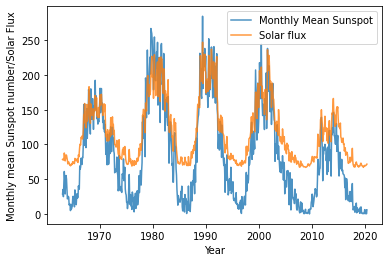

<Figure size 1080x720 with 0 Axes>

In [17]:
plt.plot(spot[['MMS']],alpha=0.8,label='Monthly Mean Sunspot')
plt.plot(spot[['F10']],alpha=0.8,label='Solar flux')
#plt.plot(spot[['Dst']],label='DST')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Monthly mean Sunspot number/Solar Flux')
plt.figure(figsize=(15,10),)
plt.show()

we see that there is a lot of noise in the data and the trend in the monthly mean sunspots number and Solar flux is similar to each other.

# Smoothing of the time series

Using moving average and exponential smoothing

Defining a function to calculate the moving average


In [18]:
def MovingAverage(n,data):
  Avg=[np.nan]
  for i in range(0,data.shape[0]-n+1):
    sum=0
    for j in range(n):
      sum=sum+data[i+j]
    sum=sum/n
    Avg.append(sum)
  for i in range(n-2):
    Avg.append(np.nan)
  return Avg

In [19]:
def plot_graph(n,m,data,label='Sunspots'):
  move=[]
  for i in range(3,3+n*m):
    move.append(MovingAverage(i,data))
  fig, axs = plt.subplots(n,m, figsize=(20, 4), facecolor='w', edgecolor='k')
  fig.subplots_adjust(hspace = .5, wspace=.001)
  fig.tight_layout(h_pad=3.0,w_pad=2.0)

  axs = axs.ravel()

  for i in range(n*m):
    axs[i].plot(move[i],label='{} Year Moving Average'.format(i+3))
    axs[i].set(xlabel='Year',ylabel=label)
    axs[i].legend()

Plotting the graph of moving average

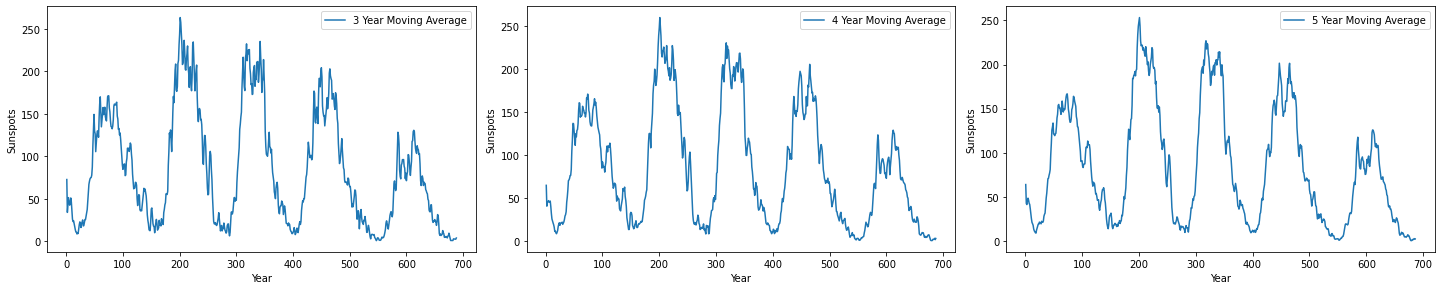

In [20]:
plot_graph(1,3,spot['MMS'])

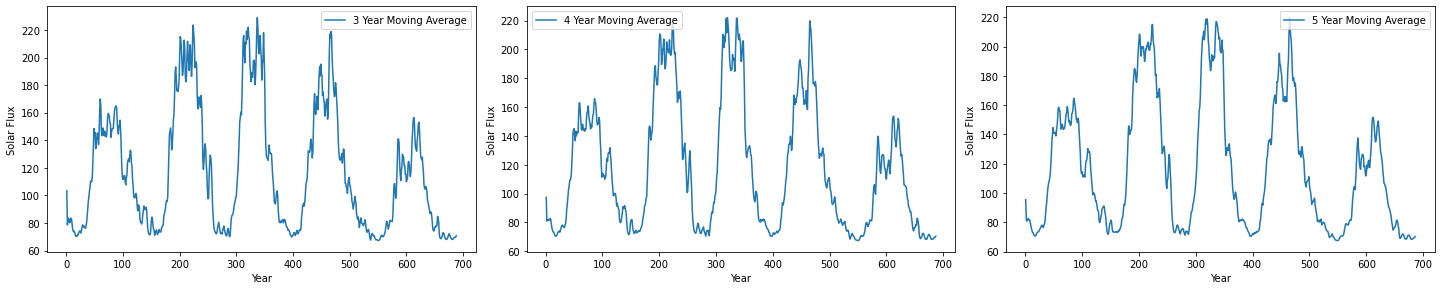

In [21]:
plot_graph(1,3,spot['F10'],'Solar Flux')

## Plotting the moving average of Monthly mean sunspot number and Solar flux

Text(0, 0.5, 'Sunspots/Flux')

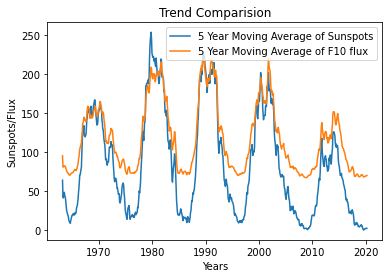

In [58]:
plt.plot(spot['Year'],MovingAverage(5,spot['MMS']),label='5 Year Moving Average of Sunspots')
plt.plot(spot['Year'],MovingAverage(5,spot['F10']),label='5 Year Moving Average of F10 flux')
plt.legend()
plt.title('Trend Comparision')
plt.xlabel('Years')
plt.ylabel('Sunspots/Flux')

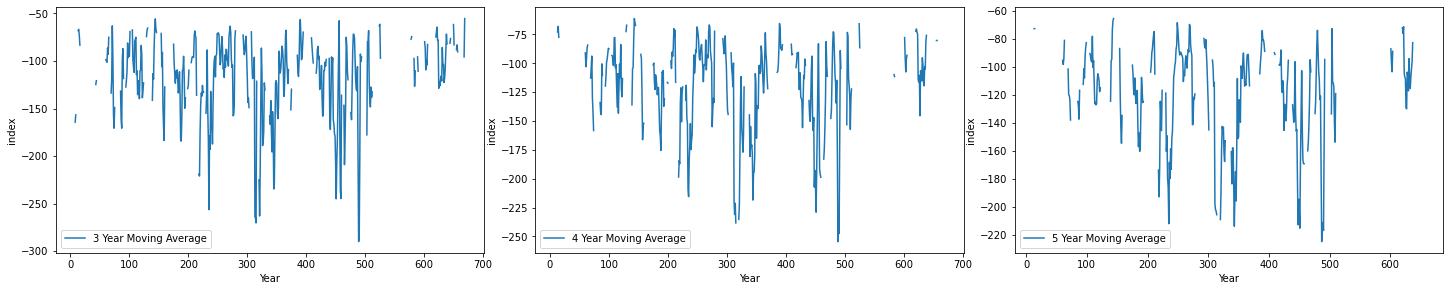

In [23]:
plot_graph(1,3,spot['Dst'],'index')

### Exponentional smoothening

creating a function to exponential smoothing

In [24]:
def expsmooth(alpha,data):
  final=[data[0]]
  for i in range(1,len(data)):
    final.append((alpha*data[i])+((1-alpha)*final[-1]))
  return final

In [25]:
def plot_exp(n,m,data,label='Sunspots'):
  exp=[]
  for i in np.arange(0.1,0.4,0.1):
    exp.append(expsmooth(i,data))
  fig, axs = plt.subplots(1,3, figsize=(20, 3), facecolor='w', edgecolor='k')
  fig.subplots_adjust(hspace = .5, wspace=.001)
  fig.tight_layout(h_pad=3.0,w_pad=2.0)

  axs = axs.ravel()

  for i in range(n*m):
    #axs[i].plot(spot['Year'],spot['MMS'])
    axs[i].plot(exp[i],label=' Exponential smoothening aplha = {}'.format(round(i/10+0.1,1)))
    axs[i].set(xlabel='Year',ylabel=label)
    axs[i].legend()

## Plotting exponential smoothed data of Sunspots and Solar Flux

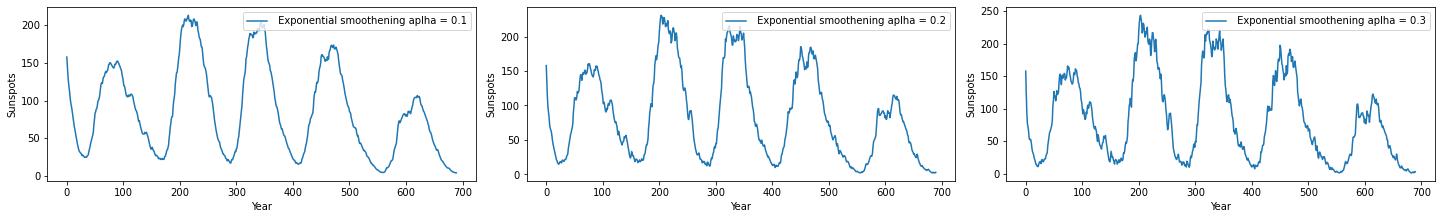

In [26]:
plot_exp(1,3,spot['MMS'])

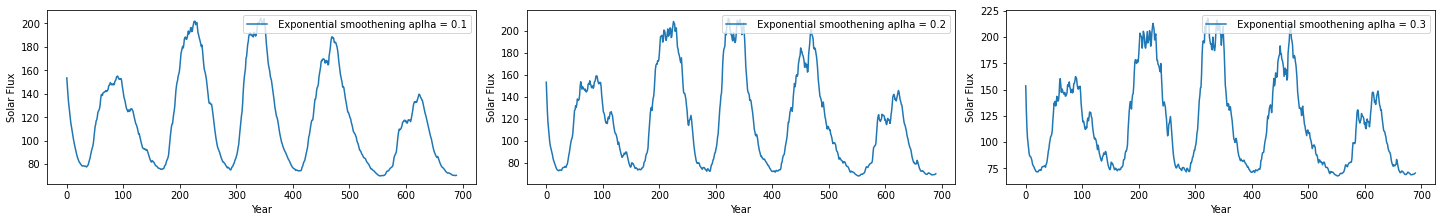

In [27]:
plot_exp(1,3,spot['F10'],'Solar Flux')

We can see that the the trends of sunspot number and F10.7 flux are very close to each other

Text(0, 0.5, 'Sunspots/Flux')

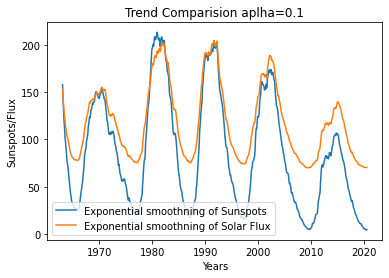

In [66]:
plt.plot(spot['Year'],expsmooth(0.1,spot['MMS']),label='Exponential smoothning of Sunspots')
plt.plot(spot['Year'],expsmooth(0.1,spot['F10']),label='Exponential smoothning of Solar Flux')
plt.legend()
plt.title('Trend Comparision aplha=0.1')
plt.xlabel('Years')
plt.ylabel('Sunspots/Flux')

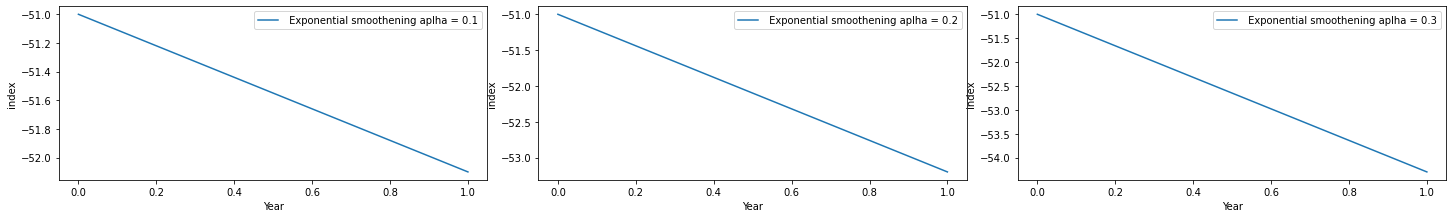

In [28]:
plot_exp(1,3,spot['Dst'],'index')

## Autocorrelation of the features

Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable's current value and its past values

[]

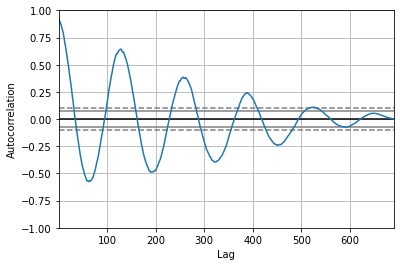

In [59]:
ax=pd.plotting.autocorrelation_plot(spot['MMS'])
ax.plot()

[]

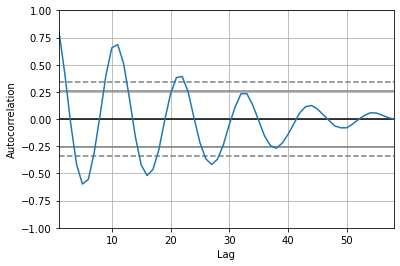

In [29]:
ax=pd.plotting.autocorrelation_plot(spot['MMS'].resample('1y').sum())
ax.plot()

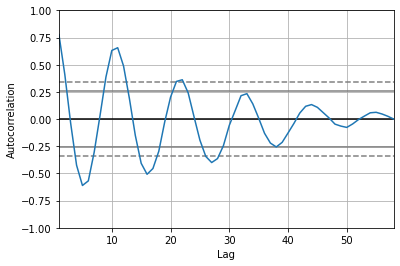

In [30]:
pd.plotting.autocorrelation_plot(spot['F10'].resample('1y').sum())

by the autocorrelation plot we find approximately determine the period of the sunspots which is aproximately near 10. The auto correlation plots of sunspots and F10.7 flux is almost the same . we can say the period of both these may also be equal

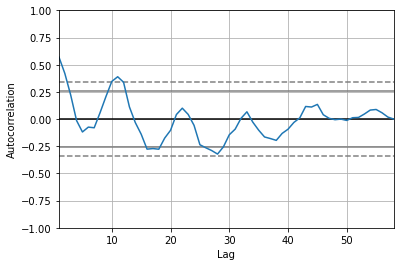

In [31]:
pd.plotting.autocorrelation_plot(spot['Dst'].resample('1y').sum())

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.78891142, 0.70490922, 0.57738764, 0.46803467, 0.39876651,
        0.39923276, 0.47980905, 0.6223002 , 0.7927933 , 0.93106441,
        1.        , 0.93106441, 0.7927933 , 0.6223002 , 0.47980905,
        0.39923276, 0.39876651, 0.46803467, 0.57738764, 0.70490922,
        0.78891142]),
 <matplotlib.lines.Line2D at 0x25d0d251760>)

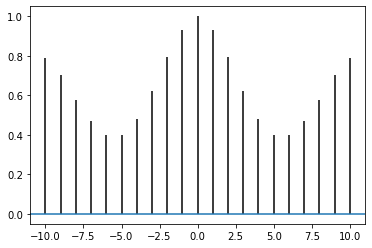

In [32]:
plt.acorr(spot["MMS"].resample('1y').median())

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.82640414, 0.81246059, 0.78420413, 0.76248679, 0.75396009,
        0.76633982, 0.80321748, 0.85898377, 0.91998011, 0.96886915,
        1.        , 0.96886915, 0.91998011, 0.85898377, 0.80321748,
        0.76633982, 0.75396009, 0.76248679, 0.78420413, 0.81246059,
        0.82640414]),
 <matplotlib.lines.Line2D at 0x25d0ce81190>)

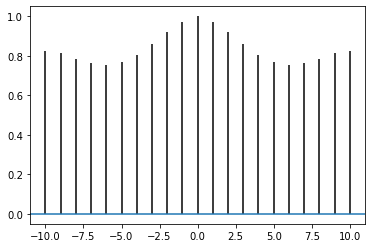

In [33]:
plt.acorr(spot["F10"].resample('1y').median())

In [34]:
date=pd.to_datetime(df['Year'].astype(str)+df['Month'].astype(str),format='%Y%m')

In [35]:
spot['date']=date

<ipython-input-35-70da346937eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot['date']=date


In [36]:
series=spot[['date','MMS']]
series.set_index('date',inplace=True)

In [37]:
series.dtypes

MMS    float64
dtype: object

# Fast Fourier Transformatiom

To identify the underlying periods of the time series

<ipython-input-64-21807aaf8ce7>:3: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1 / frequencies


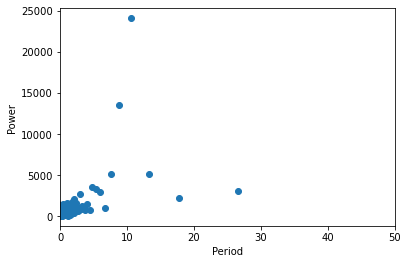

In [64]:
ft_populations = fftpack.fft(spot[['MMS']], axis=0)
frequencies = fftpack.fftfreq(len(spot['MMS']), spot['Year'].iloc[1] - spot['Year'].iloc[0])
periods = 1 / frequencies

plt.figure()
plt.plot(periods, abs(ft_populations), 'o')
plt.xlim(0, 50)
plt.xlabel('Period')
plt.ylabel('Power')
plt.show()

In [51]:
spot.sort_index(inplace=True)

<ipython-input-52-925a1d3e0ef3>:3: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1 / frequencies


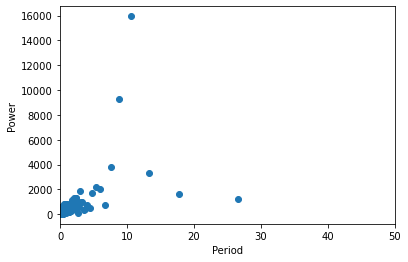

In [52]:
ft_populations = fftpack.fft(spot[['F10']], axis=0)
frequencies = fftpack.fftfreq(len(spot['F10']), spot['Year'].iloc[1] - spot['Year'].iloc[0])
periods = 1 / frequencies

plt.figure()
plt.plot(periods, abs(ft_populations), 'o')
plt.xlim(0, 50)
plt.xlabel('Period')
plt.ylabel('Power')
plt.show()

from the plots we can observe that the period with maximum power is around 10. There are a lot of periods which were observed. Which means there are many more cycles in the data

# Decomposition of the Time series of Sunspots and Solar flux

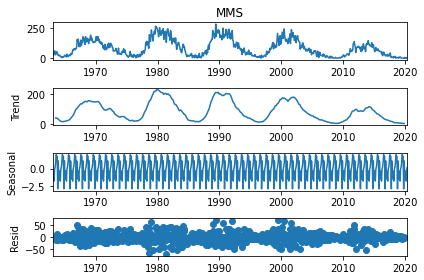

In [53]:
decomp = sm.tsa.seasonal_decompose(spot['MMS'])
figure = decomp.plot()
#plt.xlim(1980,2000)
#plt.show()

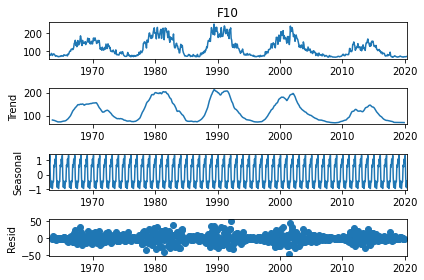

In [54]:
decomp = sm.tsa.seasonal_decompose(spot['F10'])
figure = decomp.plot()

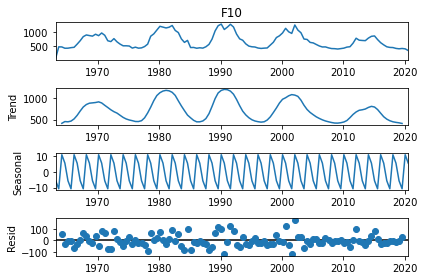

In [55]:
decomp = sm.tsa.seasonal_decompose(spot['F10'].resample('6m').sum())
figure = decomp.plot()

# Correlation between Sunspots and Solar flux

In [78]:
from scipy.signal import correlate
corr= correlate(spot['MMS'],spot['F10'],mode='same')

Text(0.5, 1.0, 'Correlation between Sunspots and Solar Flux')

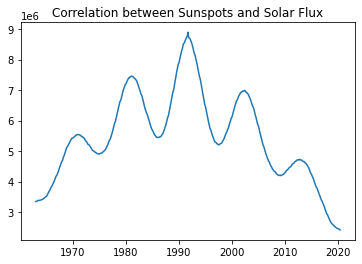

In [80]:
plt.plot(spot['Year'],corr)
plt.title('Correlation between Sunspots and Solar Flux')

In [68]:
corr.shape

(1379,)

In [69]:
spot['MMS'].shape

(690,)

In [70]:
spot['F10'].shape

(690,)